In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
os.environ["KAGGLE_CONFID_DIR"] = '/content/drive/MyDrive/GANs'

In [ ]:
%cd '/content/drive/MyDrive/GANs'

/content/drive/MyDrive/GANs


In [ ]:
!pwd

/content/drive/MyDrive/GANs


In [ ]:
!kaggle datasets download -d spandan2/cats-faces-64x64-for-generative-models

Dataset URL: https://www.kaggle.com/datasets/spandan2/cats-faces-64x64-for-generative-models
License(s): unknown
 99% 95.0M/96.0M [00:07<00:00, 21.5MB/s]
100% 96.0M/96.0M [00:07<00:00, 13.4MB/s]


In [2]:
!unzip \*.zip && rm *.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
data_dir = "./cats/cats"

In [4]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from torchvision.utils import make_grid
import pandas as pd

In [7]:
image_files = [f for f in os.listdir(data_dir)]

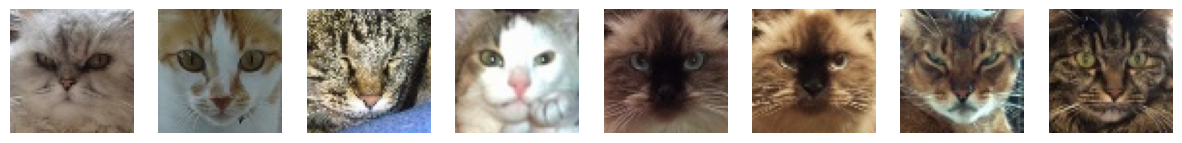

In [16]:
plt.figure(figsize=(15,4))
for i,image_file in enumerate(image_files[:8]):
    img_path = os.path.join(data_dir,image_file)
    img = Image.open(img_path)
    plt.subplot(1,8,i+1)
    plt.imshow(img)
    plt.axis("off")
plt.show()

In [17]:
subdirectories = [f.path for f in os.scandir(data_dir) if f.is_dir()]
print(len(subdirectories))

0


In [18]:
num_images = 0
for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            num_images += 1
    print(f"Found {num_images} images in directory: {dirpath}")
    num_images = 0

Found 15747 images in directory: ./cats/cats


In [10]:
import cv2

sizes = []
resolutions = []
color_distributions = []

for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in filenames:
        if filename.lower().endswith('.jpg'):  # Only process .jpg files
            img_path = os.path.join(dirpath, filename)

            # print(f"Processing file: {img_path}")

            img = cv2.imread(img_path)

            if img is None:
                print(f"Warning: Couldn't read image {img_path}")
                continue

            try:
                size = os.path.getsize(img_path)
                sizes.append(size)

                resolution = img.shape[:2]
                resolutions.append(resolution)

                color_distribution = np.bincount(img.flatten(), minlength=256)
                color_distributions.append(color_distribution)

            except Exception as e:
                print(f"Error processing file {img_path}: {e}")

sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

# print("Sizes:", sizes)
# print("Resolutions:", resolutions)
# print("Color Distributions:", color_distributions.shape)

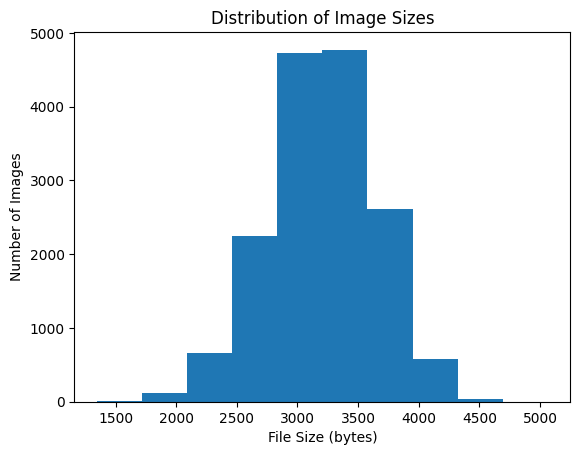

In [6]:
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

In [11]:
import plotly.express as px
import os

sizes = []

for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in filenames:
        # Get the full path of the file
        file_path = os.path.join(dirpath, filename)
        # Get the file size in bytes
        file_size = os.path.getsize(file_path)
        # Convert file size to MB and add to the list
        sizes.append(file_size / 1_000_000)


fig = px.histogram(x=sizes, nbins=50, title="Distribution of Image Sizes")

fig.update_layout(
    xaxis_title="File Size (MB)",
    yaxis_title="Number of Images",
    showlegend=False,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()


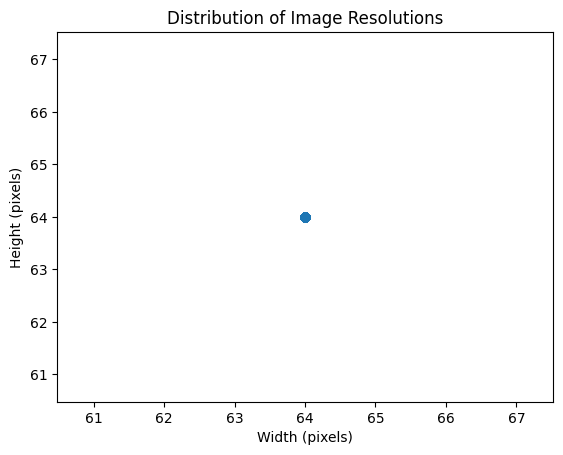

In [21]:
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

In [12]:
fig = px.scatter(x=resolutions[:, 0], y=resolutions[:, 1], title="Distribution of Image Resolutions")

fig.update_layout(
    xaxis_title="Width (pixels)",
    yaxis_title="Height (pixels)",
    showlegend=False,
    hovermode="closest",
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

fig.show()

In [13]:
df = pd.DataFrame(resolutions, columns=['width', 'height'])

fig = px.scatter_3d(df, x='width', y='height', z=df.index,
                    title='Distribution of Image Resolutions',
                    labels={'width': 'Width (pixels)',
                            'height': 'Height (pixels)',
                            'index': 'Image Index'},
                    color=df.index)

fig.update_traces(marker=dict(size=2, line=dict(width=0.5)))

fig.show()

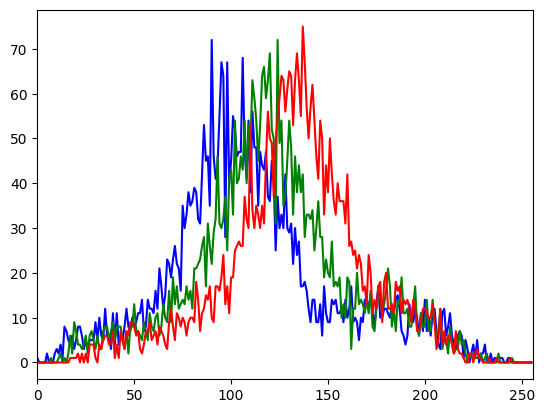

In [24]:
import cv2
img_path = os.path.join(data_dir, image_files[0])
img = cv2.imread(img_path)
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()

In [ ]:
widths, heights = [], []

for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in filenames:
        file_path = os.path.join(dirpath, filename)

        img = Image.open(file_path)
        widths.append(img.width)
        heights.append(img.height)

print(f"Ortalama Genişlik: {np.mean(widths)}, Ortalama Yükseklik: {np.mean(heights)}")
print(f"Genişlik Varyansı: {np.var(widths)}, Yükseklik Varyansı: {np.var(heights)}")
# Varyans 0 olduğu için tüm görsellerin boyutu aynı ve 64*64 boyutunda.

Ortalama Genişlik: 64.0, Ortalama Yükseklik: 64.0
Genişlik Varyansı: 0.0, Yükseklik Varyansı: 0.0


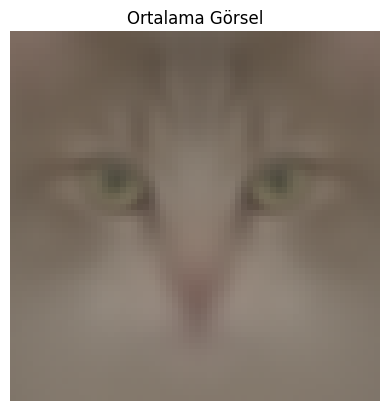

In [ ]:
img = Image.open(img_path)
img_array = np.array(img)

mean_image = np.zeros_like(img_array, dtype=np.float64)

for image_file in image_files:
    img_path = os.path.join(data_dir, image_file)
    img = Image.open(img_path)
    img_array = np.array(img)
    mean_image += img_array

mean_image /= len(image_files)
mean_image = mean_image.astype(np.uint8)

plt.imshow(mean_image)
plt.title("Ortalama Görsel")
plt.axis("off")
plt.show()

In [2]:
import os
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torch.utils.data import DataLoader
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt

In [3]:
image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

image_path = './cats'

train_ds = ImageFolder(image_path, transform=tt.Compose([
    tt.Resize(image_size),
    tt.CenterCrop(image_size),
    tt.ToTensor(),
    tt.Normalize(*stats)
]))

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

In [4]:
def denorm(img_tensors):
    return img_tensors * torch.tensor(stats[1], device=img_tensors.device).view(3, 1, 1) + \
           torch.tensor(stats[0], device=img_tensors.device).view(3, 1, 1)

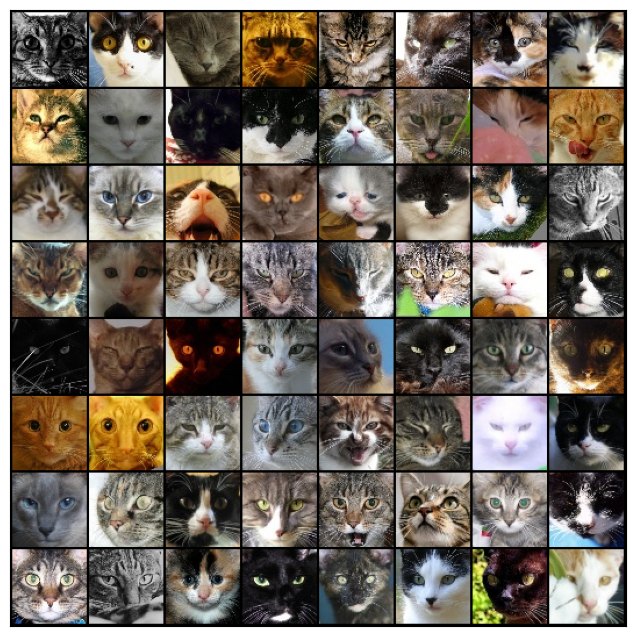

In [5]:
def gorsellestir(images, nmax = 64):
  fig, ax = plt.subplots(figsize = (8, 8))
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow = 8).permute(1, 2, 0))

def s_batch(dl, nmax = 64):
  for images, _ in dl:
    gorsellestir(images, nmax)
    break

s_batch(train_dl)

In [6]:
sample_dir = 'uretilen_gorseller'
os.makedirs(sample_dir, exist_ok=True)

In [7]:
def save_s(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)

    fake_fname = 'gen-{0:0=4d}.png'.format(index)

    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)

    print('Kaydedildi ', fake_fname)

In [8]:
import torch.nn as nn

latent_size = 128

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
          nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
          nn.BatchNorm2d(512),
          nn.ReLU(True),

          nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
          nn.BatchNorm2d(256),
          nn.ReLU(True),

          nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
          nn.BatchNorm2d(128),
          nn.ReLU(True),

          nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
          nn.BatchNorm2d(64),
          nn.ReLU(True),

          nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
          nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x)

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
          nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
          nn.BatchNorm2d(64),
          nn.LeakyReLU(0.2, inplace=True),

          nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
          nn.BatchNorm2d(128),
          nn.LeakyReLU(0.2, inplace=True),

          nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
          nn.BatchNorm2d(256),
          nn.LeakyReLU(0.2, inplace=True),

          nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
          nn.BatchNorm2d(512),
          nn.LeakyReLU(0.2, inplace=True),

          nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),

          nn.Flatten(),
          nn.Sigmoid())

    def forward(self, x):
        return self.disc(x).view(-1, 1)

In [10]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

generator = Generator().to(device)
discriminator = Discriminator().to(device)

loss_fn = nn.BCELoss()
gen_opt = optim.Adam(generator.parameters(), lr = 0.0002)
disc_opt = optim.Adam(discriminator.parameters(), lr = 0.0002)

In [11]:
def train_discriminator(real_images, fake_images):
    disc_opt.zero_grad()

    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = loss_fn(real_preds, real_targets)

    fake_preds = discriminator(fake_images)
    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_loss = loss_fn(fake_preds, fake_targets)

    disc_loss = real_loss + fake_loss
    disc_loss.backward()
    disc_opt.step()

    return disc_loss.item()

In [12]:
def train_generator(fake_images):
    gen_opt.zero_grad()

    preds = discriminator(fake_images)
    targets = torch.ones(fake_images.size(0), 1, device=device)
    gen_loss = loss_fn(preds, targets)

    gen_loss.backward()
    gen_opt.step()

    return gen_loss.item()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

gen_losses_per_epoch = []
disc_losses_per_epoch = []

def train_gan(epochs, latent_size):
    for epoch in range(epochs):
        disc_losses = []
        gen_losses = []

        for real_images, _ in train_dl:
            real_images = real_images.to(device)

            latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
            fake_images = generator(latent)

            disc_loss = train_discriminator(real_images, fake_images)
            disc_losses.append(disc_loss)

            fake_images = generator(latent)
            gen_loss = train_generator(fake_images)
            gen_losses.append(gen_loss)

        avg_gen_loss = np.mean(gen_losses)
        avg_disc_loss = np.mean(disc_losses)

        gen_losses_per_epoch.append(avg_gen_loss)
        disc_losses_per_epoch.append(avg_disc_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Gen Loss: {np.mean(gen_losses)}, Disc Loss: {np.mean(disc_losses)}")

        if epoch % 10 == 0:
            save_s(epoch, latent, generator)

In [14]:
def plot_losses():
    plt.figure(figsize=(10, 5))
    plt.plot(gen_losses_per_epoch, label='Generator Loss')
    plt.plot(disc_losses_per_epoch, label='Discriminator Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Zamana Göre Discriminator ve Generator Kayıpları')
    plt.legend()
    plt.show()

Epoch [1/500], Gen Loss: 9.120459896902885, Disc Loss: 0.11531896446080457
Kaydedildi  gen-0000.png
Epoch [2/500], Gen Loss: 8.61859377353422, Disc Loss: 0.013809861183436889
Epoch [3/500], Gen Loss: 9.584564820412666, Disc Loss: 0.007237106880864068
Epoch [4/500], Gen Loss: 8.874709967643984, Disc Loss: 0.0549958124644153
Epoch [5/500], Gen Loss: 8.811613686623112, Disc Loss: 0.021154444004716954
Epoch [6/500], Gen Loss: 9.097006267116916, Disc Loss: 0.029095923982470507
Epoch [7/500], Gen Loss: 8.480739210882495, Disc Loss: 0.0665989696459409
Epoch [8/500], Gen Loss: 7.676919229568973, Disc Loss: 0.10925524572901908
Epoch [9/500], Gen Loss: 7.038803885059972, Disc Loss: 0.0331540969388199
Epoch [10/500], Gen Loss: 7.297193842549478, Disc Loss: 0.09056141640570375
Epoch [11/500], Gen Loss: 7.744578215383714, Disc Loss: 0.07898164745570431
Kaydedildi  gen-0010.png
Epoch [12/500], Gen Loss: 8.055493741746872, Disc Loss: 0.06993794570782132
Epoch [13/500], Gen Loss: 7.230844132361874, Di

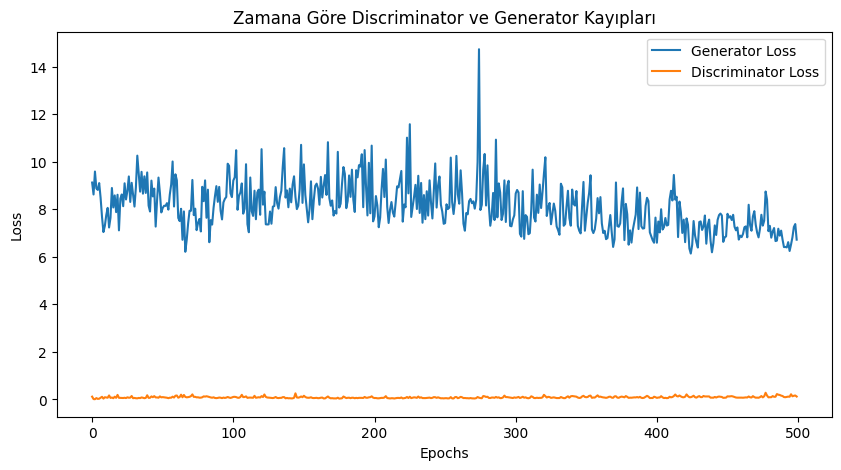

In [15]:
train_gan(500, latent_size)
plot_losses()